In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

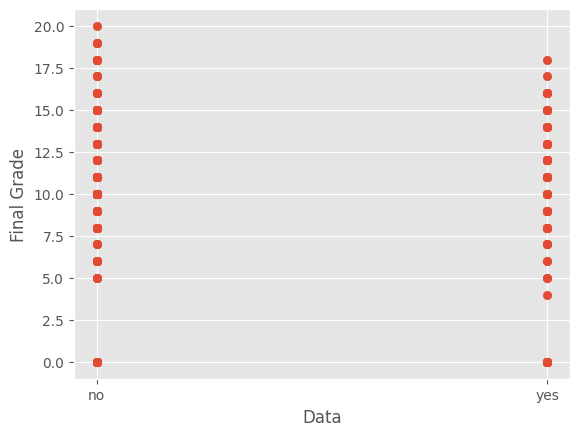

In [436]:
df = pd.read_csv('student-mat.csv',sep=';')
plt.scatter(df['romantic'],df['G3'])#check wether a piece of data affects the result (obv useful for linear regression)
plt.xlabel('Data')
plt.ylabel('Final Grade')
plt.show()

In [437]:
df = pd.read_csv('student-mat.csv', sep=';')
df = df [[
    'G1',
    'G2',
    'G3',
    'studytime',
    'failures',
    'higher',
    'absences',
    'activities',
    'romantic',
    'school',
    'sex',
    'Dalc',
    'Walc'
]]
dict = {'yes': 1, 'no': 0}
df['higher'] = df['higher'].map(dict)
df['activities'] = df['activities'].map(dict)
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df['school'] = df['school'].map({'GP': 1, 'MS': 0})
df['romantic'] = df['romantic'].map(dict)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   G1          395 non-null    int64
 1   G2          395 non-null    int64
 2   G3          395 non-null    int64
 3   studytime   395 non-null    int64
 4   failures    395 non-null    int64
 5   higher      395 non-null    int64
 6   absences    395 non-null    int64
 7   activities  395 non-null    int64
 8   romantic    395 non-null    int64
 9   school      395 non-null    int64
 10  sex         395 non-null    int64
 11  Dalc        395 non-null    int64
 12  Walc        395 non-null    int64
dtypes: int64(13)
memory usage: 40.2 KB


In [439]:
X = np.array(df.drop(columns=['G3']))
y = np.array(df['G3'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

In [440]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8623782966823208

In [441]:
# print(model.coef_)
# print(model.intercept_)
# predictions = model.predict(X_test)
# for x in range(len(predictions)):
#   print(predictions[x], y_test[x])

In [442]:
import pickle
with open("studentmodel.pickle", "wb") as f:
  pickle.dump(model, f)
# pickle_in = open("studentmodel.pickle", "rb")
# model = pickle.load(pickle_in) #saves model in a file

best = 0

for _ in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)
  model = LinearRegression()
  model.fit(X_train, y_train)
  acc = model.score(X_test, y_test)
  if( acc > best): #found better model
    best = acc
    with open("studentmodel.pickle", "wb") as f:
      pickle.dump(model, f)
print(best)
pickle_in = open("studentmodel.pickle", "rb")
model = pickle.load(pickle_in)

0.9480918831218226


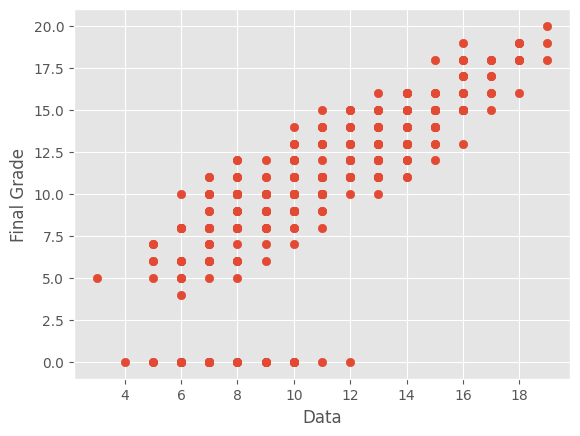

In [443]:
plt.scatter(df['G1'],df['G3'])#check wether a piece of data affects the result (obv useful for linear regression)
plt.xlabel('Data')
plt.ylabel('Final Grade')
plt.show()